In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('carprices.csv')
df.tail()

,Car Model,Mileage,Sell Price($),Age(yrs)
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6
10,Mercedez Benz C class,83000,20000,7
11,Mercedez Benz C class,79000,21000,7
12,Mercedez Benz C class,59000,33000,5


In [7]:
df.isnull().sum() #-no missing values

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

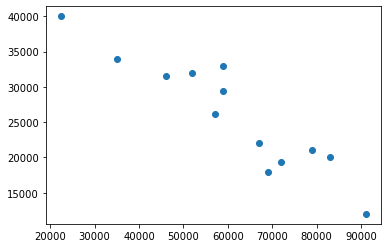

In [8]:
# plotting to see if LinearRegression can be applied
plt.scatter(df['Mileage'], df['Sell Price($)']) # probably..,but this shit is weird

In [9]:
# since there are no missing values,I can use the get_dummies() function to get the dummy variable columns
dum_df = pd.get_dummies(df['Car Model'])
dum_df

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [10]:
# joining the initial DataFrame with the dummies DataFrame
concat_df = pd.concat([df, dum_df], axis = 1)
concat_df

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [11]:
# Dropping any one of the dummies Variable Column and the Car Model Column
concat_df = concat_df.drop(['Car Model', 'Mercedez Benz C class'], axis = 1)
concat_df

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [12]:
# Creating the LinearRegression model
model = LinearRegression()
model

LinearRegression()

In [13]:
# Getting the Training Data Ready
# X:the independent Variables
X = concat_df.drop('Sell Price($)', axis = 1)
X

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [14]:
# y:the dependent Variable
y = concat_df['Sell Price($)']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [15]:
# Fitting with the Training Data
model.fit(X, y)

LinearRegression()

In [16]:
# Predicting the Price of a 4 yr old Mercedez Benz with 45000 mileage
model.predict([[45000, 4, 0, 0]])

array([36991.31721061])

In [17]:
# Predicting the Price of a 7 yr old BMW X5 with 86000 mileage
model.predict([[86000, 7, 0, 1]])

array([11080.74313219])

In [18]:
# Checking the Accuracy of the model😗
model.score(X, y) # 94%.., yo🤸‍♀️

0.9417050937281082